## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

## Nvdia Stock data download

In [2]:
start_date = "2020-01-01"
end_date = "2025-10-20"
stock_symbol = "GOOG" #GOOGLE

#tickers is the stock symbol (Hover in the download)

df = yf.download(stock_symbol, start_date, end_date)

/tmp/ipython-input-3129355134.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_symbol, start_date, end_date)
[*********************100%***********************]  1 of 1 completed


#### Data Preprocessing

In [3]:
df.reset_index(inplace=True)   #Index reset
df.head(10)

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2020-01-02,67.903824,67.942060,66.621598,66.621598,28132000
1,2020-01-03,67.570587,68.158566,66.819926,66.934938,23728000
2,2020-01-06,69.236694,69.350410,67.041216,67.041216,34646000
3,2020-01-07,69.193497,69.672715,69.046500,69.421937,30054000
4,2020-01-08,69.738770,70.099301,69.069347,69.130922,30560000
5,2020-01-09,70.508987,70.881439,70.034232,70.545738,30018000
6,2020-01-10,71.000626,71.258808,70.435493,70.892858,36414000
7,2020-01-13,71.472397,71.536457,70.816387,71.318452,33046000
8,2020-01-14,71.057732,71.600018,70.933089,71.461471,31178000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        1457 non-null   datetime64[ns]
 1   (Close, GOOG)   1457 non-null   float64       
 2   (High, GOOG)    1457 non-null   float64       
 3   (Low, GOOG)     1457 non-null   float64       
 4   (Open, GOOG)    1457 non-null   float64       
 5   (Volume, GOOG)  1457 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 68.4 KB


-- Moving average for 100 days --

In [5]:
ma_50_days = df.Close.rolling(50).mean()
ma_100_days = df.Close.rolling(100).mean()
ma_200_days = df.Close.rolling(200).mean()

## moving average of 50 days

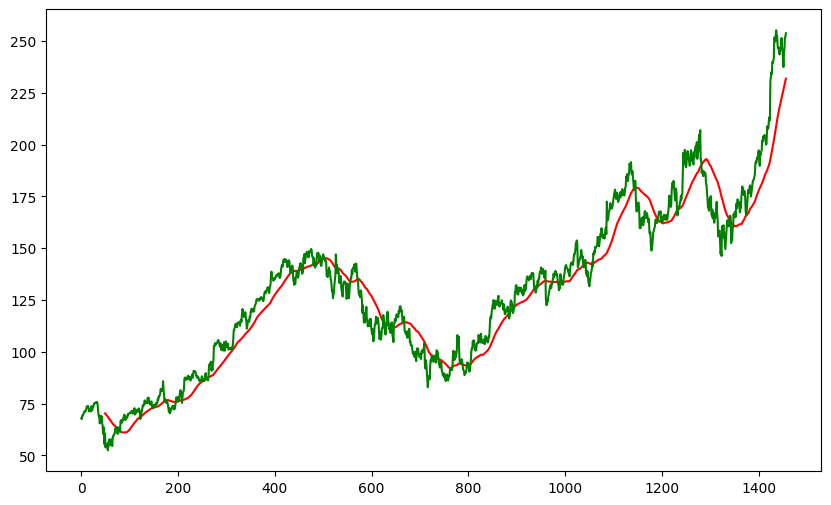

In [6]:
plt.figure(figsize=(10,6))
plt.plot(ma_50_days, 'r')
plt.plot(df.Close, 'g')
plt.show()

## moving average of 100 days

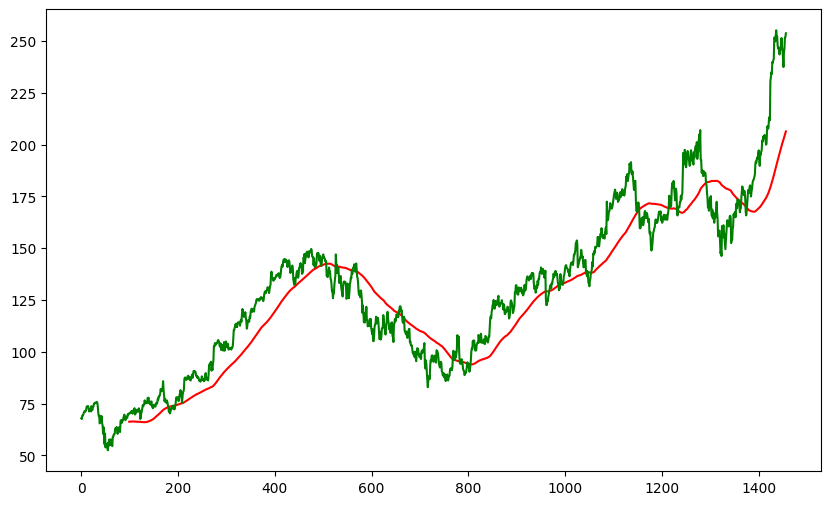

In [7]:
plt.figure(figsize=(10,6))
plt.plot(ma_100_days, 'r')
plt.plot(df.Close, 'g')
plt.show()

## moving average of 200 days

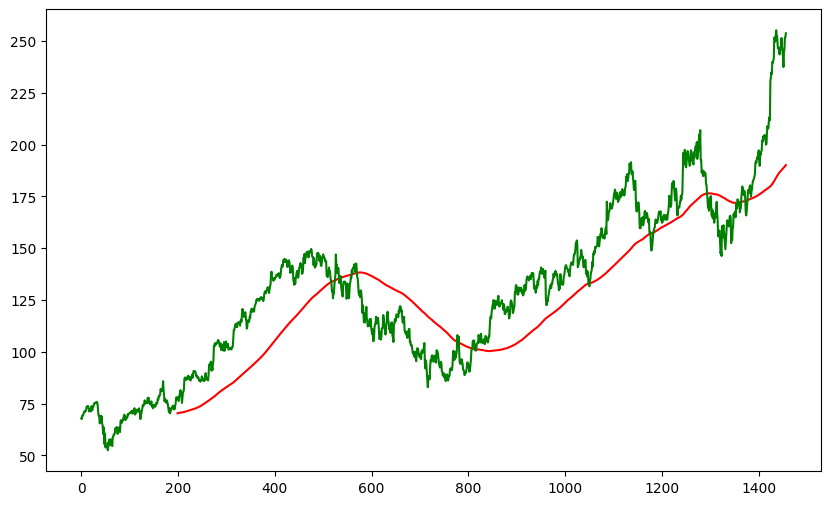

In [8]:
plt.figure(figsize=(10,6))
plt.plot(ma_200_days, 'r')
plt.plot(df.Close, 'g')
plt.show()

### Spliting Training and Testing data

In [9]:
train_data = df.Close[0: int(len(df)*0.80)]   #80 % training data
test_data = df.Close[int(len(df)*0.80):len(df)]  # 20% testing data

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))               # why we applying min max scaler  and why 0,1 range
data_train = scaler.fit_transform(train_data)

In [11]:
x = []
y = []
for i in range(100, data_train.shape[0]):
    x.append(data_train[i-100:i])
    y.append(data_train[i,0])


x = np.array(x)
y = np.array(y)

## Model Making

In [12]:
from keras.layers import Dropout, LSTM, Dense
from keras.models import Sequential

In [13]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences=True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - loss: 0.1221
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - loss: 0.0170
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - loss: 0.0107
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - loss: 0.0100
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - loss: 0.0091
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - loss: 0.0081
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - loss: 0.0091
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - loss: 0.0080
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 0.0090
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - loss: 0.0072
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - loss: 0.0074
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 172ms/step - loss: 0.0069
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 0.0064
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - loss: 0.0066
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - 

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

## Predict and testing


In [16]:
past_100days = df.Close.tail(100)
test_data = pd.concat([past_100days, test_data], ignore_index=True)
test_data = scaler.transform(test_data.values.reshape(-1, 1))
test_data

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.86663151],
       [0.8636184 ],
       [0.86282911],
       [0.84503696],
       [0.82595365],
       [0.83800633],
       [0.84101944],
       [0.87767978],
       [0.89865365],
       [0.91574877],
       [0.90698576],
       [0.89391299],
       [0.88608374],
       [0.90088033],
       [0.89578051],
       [0.87243626],
       [0.82754353],
       [0.81518907],
       [0.82761538],
       [0.85455108],
       [0.87566855],
       [0.90325071],
       [0.89692983],
       [0.89348209],
       [0.9139531 ],
       [0.91962763],
       [0.8981509 ],
       [0.88091207],
       [0.89886921],
       [0.9063393 ],
       [0.92508649],
       [0.93586073],
       [0.93794381],
       [0.94275632],
       [0.94943636],
       [0.95834307],
       [0.9957656 ],
       [1.0026612 ],
       [0.99835144],
       [1.01049045],
       [1.01681144],
       [1.01207067],
       [1.03369099],
       [1.04094574],
       [1.00804832],
       [0.98714619],
       [1.02880674],
       [1.025

In [17]:
x = []
y = []
for i in range(100, test_data.shape[0]):
    x.append(test_data[i-100:i])
    y.append(test_data[i,0])


x = np.array(x)
y = np.array(y)

y_predict= model.predict(x)
y_predict

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


array([[1.2643667 ],
       [1.2514893 ],
       [1.2105664 ],
       [1.1486989 ],
       [1.0777602 ],
       [1.0087662 ],
       [0.9490159 ],
       [0.90416914],
       [0.8764549 ],
       [0.8643425 ],
       [0.8622506 ],
       [0.86466485],
       [0.8676974 ],
       [0.8681182 ],
       [0.8640637 ],
       [0.8554267 ],
       [0.8436138 ],
       [0.8309697 ],
       [0.8196382 ],
       [0.81081927],
       [0.8049545 ],
       [0.8018482 ],
       [0.8011687 ],
       [0.8024764 ],
       [0.8049974 ],
       [0.8080737 ],
       [0.8110301 ],
       [0.8134712 ],
       [0.8154248 ],
       [0.81727725],
       [0.8194305 ],
       [0.82184005],
       [0.82426137],
       [0.8266616 ],
       [0.8282489 ],
       [0.82874703],
       [0.8277523 ],
       [0.8252966 ],
       [0.82197696],
       [0.81878394],
       [0.81653255],
       [0.815576  ],
       [0.81549567],
       [0.8158901 ],
       [0.8165769 ],
       [0.8176134 ],
       [0.81859726],
       [0.819

In [18]:
scale = scaler.scale_
scale = 1/scaler.scale_
scale

array([139.09635925])

In [19]:
y_predic = y_predict*scale
y_predic

array([[175.86881112],
       [174.07760272],
       [168.38537908],
       [159.77983848],
       [149.91252269],
       [140.31570218],
       [132.0046587 ],
       [125.76663584],
       [121.91168422],
       [120.22689639],
       [119.93592285],
       [120.27173297],
       [120.69355174],
       [120.75208471],
       [120.18811207],
       [118.98674357],
       [117.34360867],
       [115.58485871],
       [114.0086885 ],
       [112.78200822],
       [111.96624432],
       [111.53416156],
       [111.43964656],
       [111.62154647],
       [111.9722054 ],
       [112.4001096 ],
       [112.81133274],
       [113.15088201],
       [113.42262091],
       [113.68029035],
       [113.9797951 ],
       [114.31495854],
       [114.65175527],
       [114.98561705],
       [115.20640906],
       [115.27569518],
       [115.1373302 ],
       [114.79574969],
       [114.33400248],
       [113.88986491],
       [113.57670523],
       [113.44365465],
       [113.43247866],
       [113

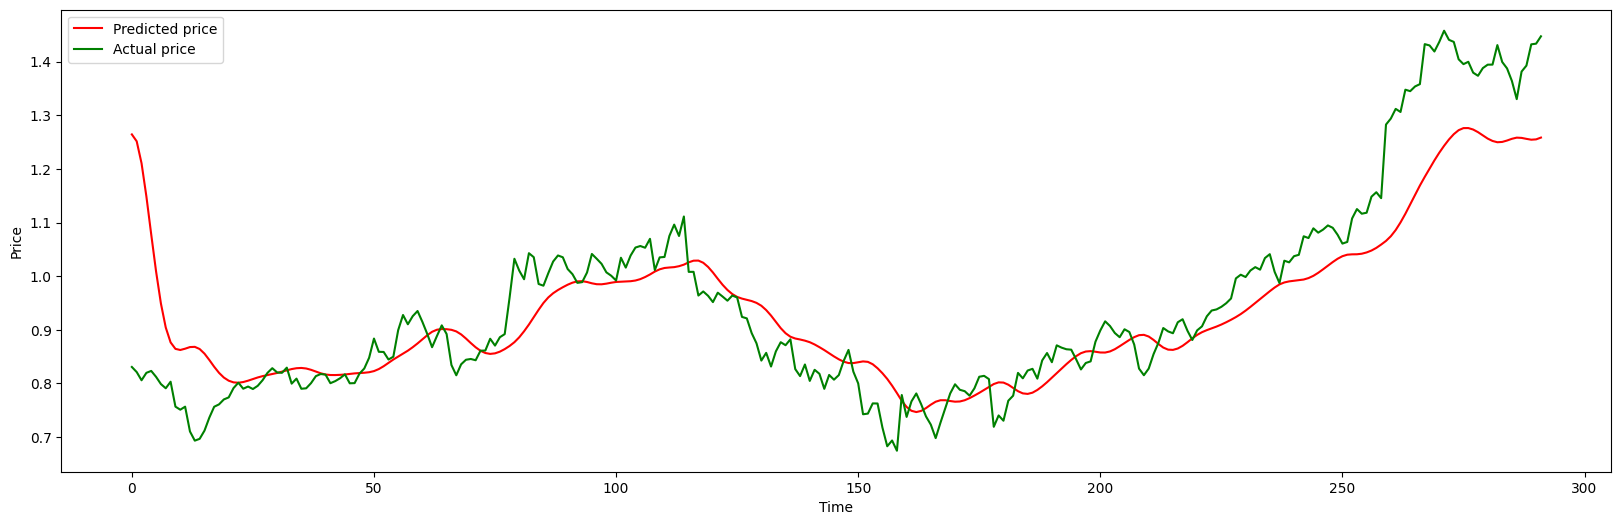

In [20]:
plt.figure(figsize=(20,6))
plt.plot(y_predict ,'r', label='Predicted price')
plt.plot(y, 'g', label='Actual price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()